## <center>**Підключення бібліотек**</center>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Бібліотеки для машинного навчання
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Моделі регресії
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import statsmodels.api as sm

# Моделі класифікації
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Моделі для ансамблю
from sklearn.ensemble import StackingRegressor


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Встановлю стиль графіків
sns.set_theme(style='whitegrid', context='notebook')

---

## <Center> **Завантаження даних та обробка даних** </Center> 

#### **Читання Файлу**

In [6]:
print(os.path.exists("calories.csv"))

True


In [7]:
ds = pd.read_csv("calories.csv")

print("Розмір даних:", ds.shape)
display(ds.head())

Розмір даних: (15000, 9)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  9 

columns:  ['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']


### **Аналіз даних**

<center><p><b>Пропущені чи відсутні значення</p></center>

In [9]:
print("Чи є будь-які відсутні дані:",ds.isnull().values.any())

Чи є будь-які відсутні дані: False


<center><p><b>Унікальні значення</p></center>

In [10]:
ds.nunique()

User_ID       15000
Gender            2
Age              60
Height           90
Weight           91
Duration         30
Heart_Rate       59
Body_Temp        45
Calories        277
dtype: int64

<center><p><b>Типи даних кожного значення</p></center>

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<center><p><b>Масштаб значень ознак</p></center>

In [12]:
ds.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<mark><b>Унікальних та аномальних даних не знайдено!</mark>

### **Очищення даних**

<center><p><b>Null Data</p></center>

In [13]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(ds, ds[x].isnull().sum())
        missing.append(x)
    else:
        print (x + " dont have null data!")

User_ID dont have null data!
Gender dont have null data!
Age dont have null data!
Height dont have null data!
Weight dont have null data!
Duration dont have null data!
Heart_Rate dont have null data!
Body_Temp dont have null data!
Calories dont have null data!


<mark><b>Пропущених даних немає!</mark>

In [14]:
ds.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


<center><p><b>Видалення колонки User_ID</p></center>

In [15]:
# видаляємо стовпець User_ID у зв'язку з тим, що він не несе корисної інформації
ds.drop(columns=["User_ID"], inplace=True)

<center><p><b>колонка - "Gender"  (One-Hot Encoding)</p></center>

In [16]:
ds = pd.get_dummies(ds, columns=["Gender"], drop_first=True)

In [17]:
ds.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,True
1,20,166.0,60.0,14.0,94.0,40.3,66.0,False
2,69,179.0,79.0,5.0,88.0,38.7,26.0,True
3,34,179.0,71.0,13.0,100.0,40.5,71.0,False
4,27,154.0,58.0,10.0,81.0,39.8,35.0,False


In [18]:
ds["Gender_male"] = ds["Gender_male"].astype(int)

In [19]:
ds.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,27,154.0,58.0,10.0,81.0,39.8,35.0,0


<center><p><b>Поділ даних на навчальні та тестові</p>

In [20]:
X = ds.drop("Calories", axis=1)
Y= ds["Calories"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Тренувальні дані:", X_train.shape[0])
print("Тестові дані:", X_test.shape[0])

Тренувальні дані: 12000
Тестові дані: 3000


<center><p><b>Стандартизація</p>

In [ ]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index) 

## <Center> **Розв’язання задачі ймовірнісної регресії** </Center> 

#### <center> <p style = 'background-color:darkblue'><b>Лінійна регресія</p> </center>

Лінійна регресія - MAE: 8.442, RMSE: 11.489, R²: 0.967


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
11499,170.676460,0.254612,170.177380,171.175540,148.578268,192.774652
6475,192.088578,0.345566,191.411212,192.765944,169.985641,214.191515
13167,56.147964,0.252993,55.652057,56.643871,34.049844,78.246084
862,155.476415,0.254109,154.978320,155.974510,133.378245,177.574584
5970,212.450667,0.333738,211.796486,213.104848,190.348428,234.552905


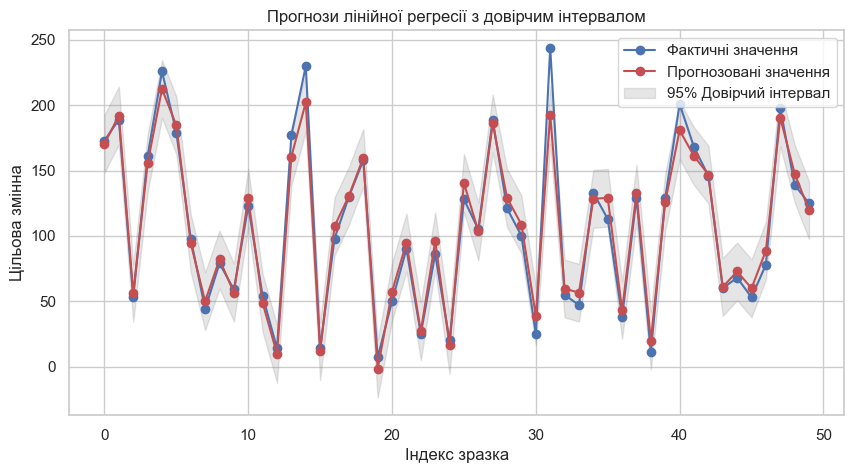

In [22]:
#Модель
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Метрики
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("Лінійна регресія - MAE: {:.3f}, RMSE: {:.3f}, R²: {:.3f}".format(mae_lr, rmse_lr, r2_lr))

# Для отримання довірчих інтервалів використаємо OLS з statsmodels
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

ols_model = sm.OLS(y_train, X_train_sm).fit()
predictions_sm = ols_model.get_prediction(X_test_sm)
pred_summary = predictions_sm.summary_frame(alpha=0.05)  # 95% інтервал
display(pred_summary.head())


# Візуалізація прогнозів лінійної регресії з довірчими інтервалами для перших 50 зразків
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], 'bo-', label='Фактичні значення')
plt.plot(y_pred_lr[:50], 'ro-', label='Прогнозовані значення')
plt.fill_between(np.arange(50), 
                 pred_summary['obs_ci_lower'][:50], 
                 pred_summary['obs_ci_upper'][:50], 
                 color='gray', alpha=0.2, label='95% Довірчий інтервал')
plt.legend()
plt.xlabel('Індекс зразка')
plt.ylabel('Цільова змінна')
plt.title('Прогнози лінійної регресії з довірчим інтервалом')
plt.show()

#### <center> <p style = 'background-color:darkblue'><b>Ridge + Bootstrap</p> </center>

   Actual   Predicted  Lower Bound (95%)  Upper Bound (95%)
0   173.0  170.676314         170.170294         171.162387
1   189.0  192.088273         191.259955         192.872041
2    53.0   56.148122          55.699489          56.596559
3   161.0  155.476398         154.869438         156.105561
4   226.0  212.450645         211.543809         213.257323
Ridge Regression - MAE: 8.442, RMSE: 11.489, R²: 0.967


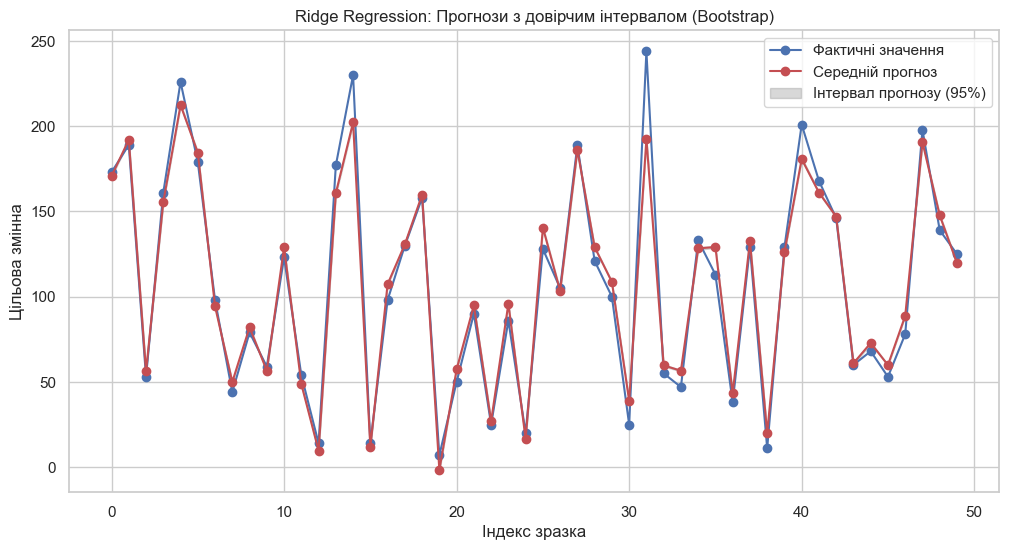

Скільки значень потрапило в інтервал: 129
Загальна кількість: 3000
Покриття інтервалом: 4.300%


In [23]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample


alpha_search = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 0.05, 0.15, 100.0], cv=5)
alpha_search.fit(X_train_scaled, y_train)
best_alpha = alpha_search.alpha_

# Bootstrap з фіксованим alpha
n_iterations = 1500
predictions = []

for i in range(n_iterations):
    X_resampled, y_resampled = resample(X_train_scaled, y_train, random_state=i)
    rr_boot = Ridge(alpha=best_alpha)
    rr_boot.fit(X_resampled, y_resampled)
    y_pred_i = rr_boot.predict(X_test_scaled)
    predictions.append(y_pred_i)

predictions = np.array(predictions)

# Квантилі
lower_bounds = np.percentile(predictions, 2.5, axis=0)
upper_bounds = np.percentile(predictions, 97.5, axis=0)

rr_final = Ridge(alpha=best_alpha)
rr_final.fit(X_train_scaled, y_train)
y_pred_rr = rr_final.predict(X_test_scaled)

# Таблиця результатів
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_rr,
    'Lower Bound (95%)': lower_bounds,
    'Upper Bound (95%)': upper_bounds
})
print(results_df.head(5))

# Метрики
mae_rr = mean_absolute_error(y_test, y_pred_rr)
rmse_rr = np.sqrt(mean_squared_error(y_test, y_pred_rr))
r2_rr = r2_score(y_test, y_pred_rr)
print("Ridge Regression - MAE: {:.3f}, RMSE: {:.3f}, R²: {:.3f}".format(mae_rr, rmse_rr, r2_rr))

# Візьмемо перші 50 зразків
indices = np.arange(50)

# Діапазони (інтервали)
y_pred_min = lower_bounds
y_pred_max = upper_bounds

# Візьмемо перші 50 зразків ТА ЇХ ІНДЕКСИ
subset = results_df.iloc[:50]
indices = subset.index

plt.figure(figsize=(12, 6))
plt.plot(indices, subset["Actual"], 'bo-', label='Фактичні значення')
plt.plot(indices, subset["Predicted"], 'ro-', label='Середній прогноз')
plt.fill_between(indices, subset["Lower Bound (95%)"], subset["Upper Bound (95%)"],
                 color='gray', alpha=0.3, label='Інтервал прогнозу (95%)')
plt.xlabel('Індекс зразка')
plt.ylabel('Цільова змінна')
plt.title('Ridge Regression: Прогнози з довірчим інтервалом (Bootstrap)')
plt.legend()
plt.grid(True)
plt.show()

results_df["Inside Interval"] = (
    (results_df["Actual"] >= results_df["Lower Bound (95%)"]) &
    (results_df["Actual"] <= results_df["Upper Bound (95%)"])
)

print("Скільки значень потрапило в інтервал:", results_df["Inside Interval"].sum())
print("Загальна кількість:", len(results_df))

inside_count = results_df["Inside Interval"].sum()
total = len(results_df)
coverage = inside_count / total
print(f"Покриття інтервалом: {coverage:.3%}")




## <Center> **Дослідження ансамблевих методів** </Center> 

#### <center> <p style = 'background-color:darkblue'><b>Random Forest + Mapie</p> </center>

   Actual  Predicted  Lower Bound (95%)  Upper Bound (95%)
0   173.0     170.05             163.66             176.71
1   189.0     192.01             186.97             200.20
2    53.0      52.84              46.69              59.55
3   161.0     159.77             152.92             166.14
4   226.0     220.65             214.83             227.73
Random Forest - MAE: 1.686, RMSE: 2.637, R²: 0.998


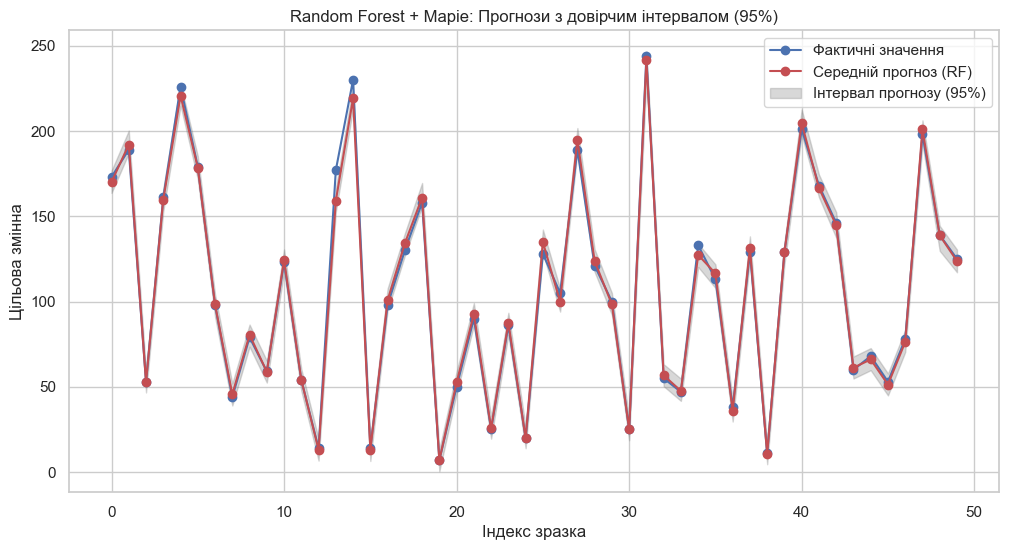

Скільки значень потрапило в інтервал: 2905
Загальна кількість: 3000


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from mapie.regression import MapieRegressor

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_

# Крок 2: MAPIE з оптимізованим RandomForest
mapie = MapieRegressor(estimator=best_rf, method="plus")
mapie.fit(X_train_scaled, y_train)
y_pred, y_pis = mapie.predict(X_test_scaled, alpha=0.05)

lower_bounds = y_pis[:, 0, 0]
upper_bounds = y_pis[:, 1, 0]

mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)
avg_interval_width = np.mean(upper_bounds - lower_bounds)

results_rf_optimized = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Lower Bound (95%)': lower_bounds,
    'Upper Bound (95%)': upper_bounds
})
print(results_rf_optimized.head(5))
print("Random Forest - MAE: {:.3f}, RMSE: {:.3f}, R²: {:.3f}".format(mae_rf, rmse_rf, r2_rf))

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test.values[:50], 'bo-', label='Фактичні значення')
plt.plot(indices, y_pred[:50], 'ro-', label='Середній прогноз (RF)')
plt.fill_between(indices, lower_bounds[:50], upper_bounds[:50], color='gray', alpha=0.3, label='Інтервал прогнозу (95%)')
plt.xlabel('Індекс зразка')
plt.ylabel('Цільова змінна')
plt.title('Random Forest + Mapie: Прогнози з довірчим інтервалом (95%)')
plt.legend()
plt.grid(True)
plt.show()

results_rf_optimized["Inside Interval"] = (
    (results_rf_optimized["Actual"] >= results_rf_optimized["Lower Bound (95%)"]) &
    (results_rf_optimized["Actual"] <= results_rf_optimized["Upper Bound (95%)"])
)

print("Скільки значень потрапило в інтервал:", results_rf_optimized["Inside Interval"].sum())
print("Загальна кількість:", len(results_rf_optimized))



#### <center> <p style = 'background-color:darkblue'><b>XGBoost + Mapie</p> </center>

   Actual   Predicted  Lower Bound (95%)  Upper Bound (95%)
0   173.0  173.214996         169.383369         177.756897
1   189.0  190.385330         185.763245         195.349869
2    53.0   53.279297          49.081734          56.297974
3   161.0  159.281219         157.748627         165.101639
4   226.0  223.783615         220.469704         227.799255
XGBoost - MAE: 1.162, RMSE: 1.611, R²: 0.999


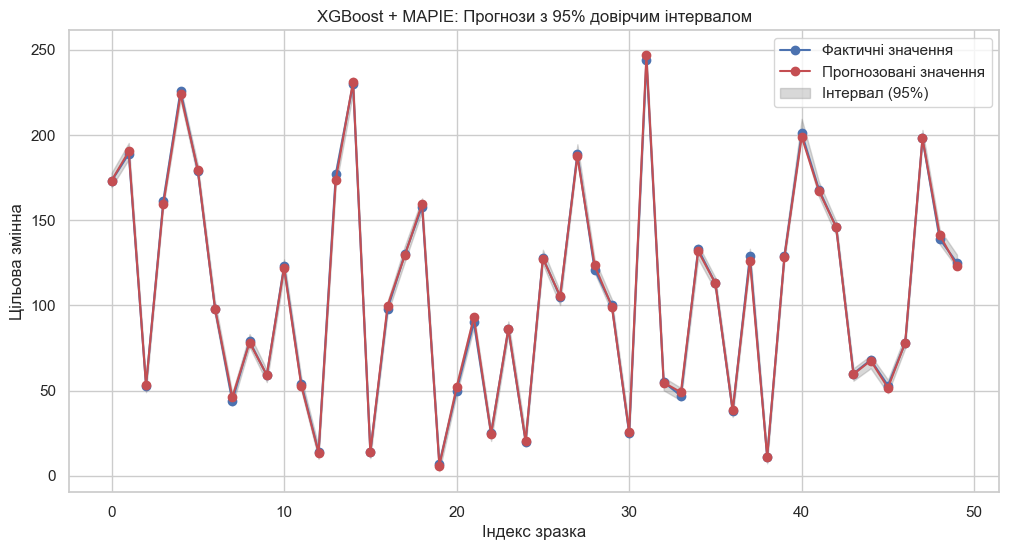

Скільки значень потрапило в інтервал: 2966
Загальна кількість: 3000


In [25]:
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)
best_xgb = grid_search.best_estimator_

# MAPIE
mapie = MapieRegressor(estimator=best_xgb, method="plus")
mapie.fit(X_train_scaled, y_train)
y_pred, y_pis = mapie.predict(X_test_scaled, alpha=0.05)

# Межі інтервалу
lower_bounds = y_pis[:, 0, 0]
upper_bounds = y_pis[:, 1, 0]

# Метрики
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
avg_interval_width = np.mean(upper_bounds - lower_bounds)

# Таблиця результатів
results_df_gxb = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Lower Bound (95%)': lower_bounds,
    'Upper Bound (95%)': upper_bounds
})
print(results_df_gxb.head(5))
print("XGBoost - MAE: {:.3f}, RMSE: {:.3f}, R²: {:.3f}".format(mae, rmse, r2))

# Візуалізація
indices = np.arange(50)
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test.values[:50], 'bo-', label='Фактичні значення')
plt.plot(indices, y_pred[:50], 'ro-', label='Прогнозовані значення')
plt.fill_between(indices, lower_bounds[:50], upper_bounds[:50], color='gray', alpha=0.3, label='Інтервал (95%)')
plt.xlabel('Індекс зразка')
plt.ylabel('Цільова змінна')
plt.title('XGBoost + MAPIE: Прогнози з 95% довірчим інтервалом')
plt.legend()
plt.grid(True)
plt.show()

results_df_gxb["Inside Interval"] = (
    (results_df_gxb["Actual"] >= results_df_gxb["Lower Bound (95%)"]) &
    (results_df_gxb["Actual"] <= results_df_gxb["Upper Bound (95%)"])
)

print("Скільки значень потрапило в інтервал:", results_df_gxb["Inside Interval"].sum())
print("Загальна кількість:", len(results_df_gxb))

#### <center> <p style = 'background-color:darkblue'><b>Stacking</p> </center>

   Actual   Predicted  Lower Bound (95%)  Upper Bound (95%)
0   173.0  173.265961         165.185696         177.222076
1   189.0  196.375336         187.270973         199.860306
2    53.0   51.760918          46.957596          58.076763
3   161.0  163.793320         155.396072         167.268356
4   226.0  223.688644         218.580215         230.074097
Скільки значень потрапило в інтервал: 2943
Загальна кількість: 3000
Відсоток покриття інтервалом: 98.10%
XGBoost - MAE: 1.736, RMSE: 2.524, R²: 0.998


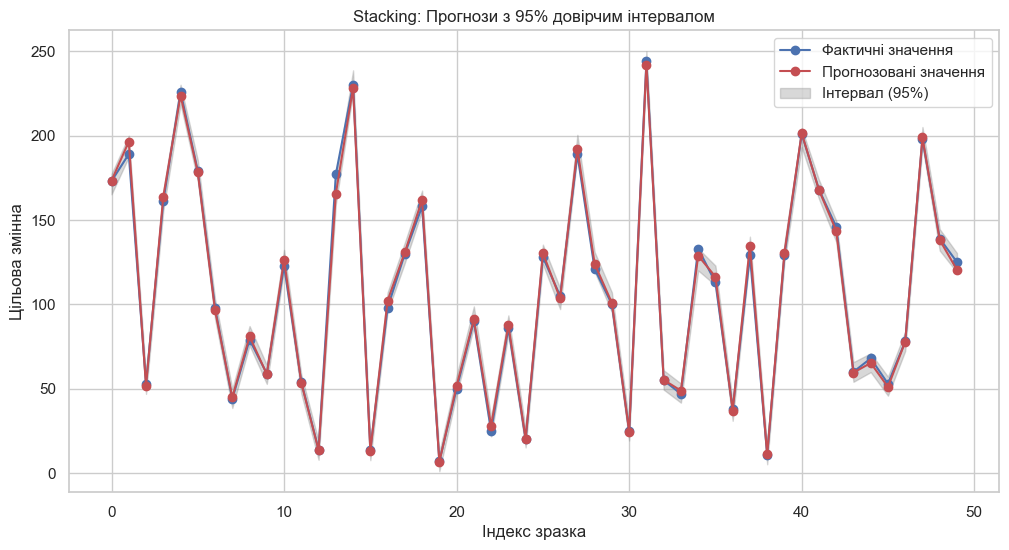

In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Підбір для RandomForestRegressor (замість Ridge)
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 4]
}
rf_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5)
rf_search.fit(X_train_scaled, y_train)
best_rf = rf_search.best_estimator_

# Підбір для DecisionTreeRegressor
tree_param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 4, 6]
}
tree_search = GridSearchCV(DecisionTreeRegressor(), tree_param_grid, cv=5)
tree_search.fit(X_train_scaled, y_train)
best_tree = tree_search.best_estimator_

# Підбір для GradientBoostingRegressor (замість KNN)
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}
gb_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=5)
gb_search.fit(X_train_scaled, y_train)
best_gb = gb_search.best_estimator_

# Підбір для XGBRegressor (метамодель)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5]
}
xgb_search = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, cv=5)
xgb_search.fit(X_train_scaled, y_train)
best_xgb = xgb_search.best_estimator_

# Побудова стеку з новими базовими моделями
base_models = [
    ('rf', best_rf),
    ('tree', best_tree),
    ('gb', best_gb)
]

stack_optimized = StackingRegressor(
    estimators=base_models,
    final_estimator=best_xgb,
    cv=5
)

# Навчання стеку
stack_optimized.fit(X_train_scaled, y_train)
y_pred = stack_optimized.predict(X_test_scaled)

# Метрики
mae_opt = mean_absolute_error(y_test, y_pred)
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred))
r2_opt = r2_score(y_test, y_pred)

# Обгортка стеку в Mapie для побудови довірчих інтервалів
mapie = MapieRegressor(estimator=stack_optimized, method="plus")
mapie.fit(X_train_scaled, y_train)

# Прогноз з довірчими межами (95%)
y_pred, y_pis = mapie.predict(X_test_scaled, alpha=0.05)

# Межі інтервалу
lower_bounds = y_pis[:, 0, 0]
upper_bounds = y_pis[:, 1, 0]

# Таблиця з інтервалами
results_mapie_stack = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Lower Bound (95%)': lower_bounds,
    'Upper Bound (95%)': upper_bounds
})

print(results_mapie_stack.head(5))
# Чи потрапляє фактичне значення в інтервал
results_mapie_stack["Inside Interval"] = (
    (results_mapie_stack["Actual"] >= results_mapie_stack["Lower Bound (95%)"]) &
    (results_mapie_stack["Actual"] <= results_mapie_stack["Upper Bound (95%)"])
)
print("Скільки значень потрапило в інтервал:", results_mapie_stack["Inside Interval"].sum())
print("Загальна кількість:", len(results_mapie_stack))
coverage = (results_mapie_stack["Inside Interval"].sum() / len(results_mapie_stack)) * 100
print(f"Відсоток покриття інтервалом: {coverage:.2f}%")

# Метрики
print("XGBoost - MAE: {:.3f}, RMSE: {:.3f}, R²: {:.3f}".format(mae_opt, rmse_opt, r2_opt))


# Візуалізація
indices = np.arange(50)
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test.values[:50], 'bo-', label='Фактичні значення')
plt.plot(indices, y_pred[:50], 'ro-', label='Прогнозовані значення')
plt.fill_between(indices, lower_bounds[:50], upper_bounds[:50], color='gray', alpha=0.3, label='Інтервал (95%)')
plt.xlabel('Індекс зразка')
plt.ylabel('Цільова змінна')
plt.title('Stacking: Прогнози з 95% довірчим інтервалом')
plt.legend()
plt.grid(True)
plt.show()

## <Center> **Перехід від регресії до класифікації** </Center>

#### <center> <p style = 'background-color:darkblue'><b>Дискретизація - pd.cut()</p> </center>

In [27]:
n_bins = 5
ds["Calories_class"] = pd.cut(ds["Calories"], bins=n_bins, labels=False)
ds["Calories_class"].value_counts()

Calories_class
0    6310
1    4306
2    3218
3    1100
4      66
Name: count, dtype: int64

<center><p><b>Стандартизація, Розподіл та Заповнення синтетичними даними</p>

In [28]:
# Розбиваємо X та y
X = ds.drop(columns=['Calories', 'Calories_class'])
y = ds['Calories_class']

# Train-test split
X_train_clasify_cut, X_test_clasify_cut, y_train_clasify_cut, y_test_clasify_cut = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_clasify_scaled_cut = scaler.fit_transform(X_train_clasify_cut)
X_test_clasify_scaled_cut = scaler.transform(X_test_clasify_cut)

# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_clasify_scaled_cut, y_train_clasify_cut)

<center><p><b>Перевірка розподілу класів після синтезації даних</p>

Розподіл класів після SMOTE: {np.int64(0): np.int64(4733), np.int64(1): np.int64(4733), np.int64(2): np.int64(4733), np.int64(3): np.int64(4733), np.int64(4): np.int64(4733)}


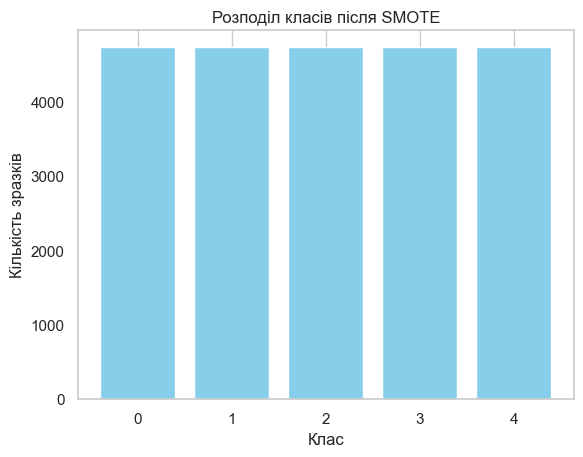

In [29]:
import numpy as np

unique, counts = np.unique(y_train_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Розподіл класів після SMOTE:", class_distribution)

import matplotlib.pyplot as plt

plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.title("Розподіл класів після SMOTE")
plt.xlabel("Клас")
plt.ylabel("Кількість зразків")
plt.xticks(list(class_distribution.keys()))
plt.grid(axis='y')
plt.show()

In [30]:
pd.Series(y_train_resampled).value_counts().sort_index()

Calories_class
0    4733
1    4733
2    4733
3    4733
4    4733
Name: count, dtype: int64

In [31]:
import pandas as pd

# Для тренувальної вибірки
print("Train class distribution:")
print(pd.Series(y_train_clasify_cut).value_counts().sort_index().sum())

# Для тестової вибірки
print("\nTest class distribution:")
print(pd.Series(y_test_clasify_cut).value_counts().sort_index().sum())


Train class distribution:
11250

Test class distribution:
3750


<center><p><b>Класифікація за використання XGBoost</p>

In [32]:
xgb_clf_cut = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf_cut.fit(X_train_resampled, y_train_resampled)
y_pred_xgb_cut = xgb_clf_cut.predict(X_test_clasify_scaled_cut)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test_clasify_cut, y_pred_xgb_cut))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clasify_cut, y_pred_xgb_cut))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1577
           1       0.97      0.98      0.97      1076
           2       0.97      0.97      0.97       805
           3       0.93      0.96      0.94       275
           4       0.87      0.76      0.81        17

    accuracy                           0.98      3750
   macro avg       0.95      0.93      0.94      3750
weighted avg       0.98      0.98      0.98      3750

Confusion Matrix:
[[1555   22    0    0    0]
 [  11 1052   13    0    0]
 [   0   10  779   16    0]
 [   0    0   10  263    2]
 [   0    0    0    4   13]]


<center><p><b>Класифікація за використання DecisionTreeClassifier</p>

In [33]:
param_grid_cut = {
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_cut = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_cut,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)
grid_search_cut.fit(X_train_resampled, y_train_resampled)
best_tree_cut = grid_search_cut.best_estimator_
y_pred_tree_cut = best_tree_cut.predict(X_test_clasify_scaled_cut)

print("\n📋 Classification Report (Decision Tree, cut, після оптимізації):")
print(classification_report(y_test_clasify_cut, y_pred_tree_cut))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_clasify_cut, y_pred_tree_cut))


📋 Classification Report (Decision Tree, cut, після оптимізації):
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1577
           1       0.84      0.90      0.87      1076
           2       0.83      0.78      0.80       805
           3       0.66      0.64      0.65       275
           4       0.24      0.76      0.37        17

    accuracy                           0.87      3750
   macro avg       0.71      0.80      0.73      3750
weighted avg       0.88      0.87      0.87      3750

📊 Confusion Matrix:
[[1485   92    0    0    0]
 [  37  970   69    0    0]
 [   0   89  625   88    3]
 [   0    0   61  176   38]
 [   0    0    0    4   13]]


#### <center> <p style = 'background-color:darkblue'><b>Дискретизація - pd.qcut()</p> </center>

In [34]:
bins = 5

ds["Calories_class"] = pd.qcut(ds["Calories"], q=bins, labels=False)

ds["Calories_class"].value_counts()

Calories_class
0    3120
3    3026
2    2962
4    2956
1    2936
Name: count, dtype: int64

<center><p><b>Стандартизація та Розподіл</p>

In [35]:
# Розбиваємо X та y
X = ds.drop(columns=['Calories', 'Calories_class'])
y = ds['Calories_class']

# Train-test split
X_train_clasify_qcut, X_test_clasify_qcut, y_train_clasify_qcut, y_test_clasify_qcut = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_clasify_scaled_qcut = scaler.fit_transform(X_train_clasify_qcut)
X_test_clasify_scaled_qcut = scaler.transform(X_test_clasify_qcut)

<center><p><b>Класифікація за використання XGBoost</p>

In [36]:
xgb_clf_qcut = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf_qcut.fit(X_train_clasify_scaled_qcut, y_train_clasify_qcut)
y_pred_xgb_qcut = xgb_clf_qcut.predict(X_test_clasify_scaled_qcut)

print("XGBoost — Classification Report:")
print(classification_report(y_test_clasify_qcut, y_pred_xgb_qcut))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clasify_qcut, y_pred_xgb_qcut))

XGBoost — Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       780
           1       0.96      0.97      0.96       734
           2       0.96      0.95      0.96       741
           3       0.95      0.95      0.95       756
           4       0.97      0.97      0.97       739

    accuracy                           0.97      3750
   macro avg       0.97      0.97      0.97      3750
weighted avg       0.97      0.97      0.97      3750

Confusion Matrix:
[[767  13   0   0   0]
 [ 12 710  12   0   0]
 [  0  19 707  15   0]
 [  0   0  15 721  20]
 [  0   0   0  20 719]]


<center><p><b>Класифікація за використання DecisionTreeClassifier</p>

In [37]:
# Гіперпараметри для оптимізації
param_grid = {
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

grid_search.fit(X_train_clasify_scaled_qcut, y_train_clasify_qcut)
best_tree = grid_search.best_estimator_
y_pred_tree_qcut = best_tree.predict(X_test_clasify_scaled_qcut)

print("\n📋 Decision Tree — Classification Report (після оптимізації):")
print(classification_report(y_test_clasify_qcut, y_pred_tree_qcut))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_clasify_qcut, y_pred_tree_qcut))


📋 Decision Tree — Classification Report (після оптимізації):
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       780
           1       0.79      0.89      0.84       734
           2       0.78      0.79      0.78       741
           3       0.75      0.81      0.78       756
           4       0.94      0.81      0.87       739

    accuracy                           0.84      3750
   macro avg       0.85      0.84      0.84      3750
weighted avg       0.85      0.84      0.84      3750

📊 Confusion Matrix:
[[704  76   0   0   0]
 [ 18 656  60   0   0]
 [  0  94 583  64   0]
 [  0   0 105 610  41]
 [  0   0   0 137 602]]


## <Center> **Дослідження розподілу ймовірностей у класифікації** </Center>

<center><p><b>Передбачення ймовірностей для кожного класу</p>

In [38]:
probs_tree = best_tree_cut.predict_proba(X_test_clasify_scaled_cut)
logits_xgb = xgb_clf_cut.predict_proba(X_test_clasify_scaled_cut)

In [39]:
# Обчислюємо максимум імовірності по класах
max_probs_tree = np.max(probs_tree, axis=1)
max_probs_xgb = np.max(logits_xgb, axis=1)

max_probs_tree[:5], max_probs_xgb[:5]

(array([0.99970318, 0.86387864, 0.75510204, 0.99970318, 0.52941176]),
 array([0.99999547, 0.9991235 , 0.9996283 , 0.9999999 , 0.99835736],
       dtype=float32))

In [40]:
# Для DecisionTreeClassifier
probs_tree_df = pd.DataFrame(probs_tree, columns=[f"Class {i}" for i in range(probs_tree.shape[1])])
probs_tree_df["Predicted Class"] = np.argmax(probs_tree, axis=1)
print("Ймовірності для Decision Tree:")
display(probs_tree_df.head())


Ймовірності для Decision Tree:


,Class 0,Class 1,Class 2,Class 3,Class 4,Predicted Class
0,0.999703,0.000297,0.000000,0.000000,0.0,0
1,0.000000,0.040180,0.863879,0.095941,0.0,2
2,0.244898,0.755102,0.000000,0.000000,0.0,1
3,0.999703,0.000297,0.000000,0.000000,0.0,0
4,0.000000,0.529412,0.470588,0.000000,0.0,1


In [41]:
# Для XGBoost
probs_xgb_df = pd.DataFrame(logits_xgb, columns=[f"Class {i}" for i in range(logits_xgb.shape[1])])
probs_xgb_df["Predicted Class"] = np.argmax(logits_xgb, axis=1)
print("Ймовірності для XGBoost:")
display(probs_xgb_df.head())

Ймовірності для XGBoost:


,Class 0,Class 1,Class 2,Class 3,Class 4,Predicted Class
0,0.999995,4.205334e-06,1.088406e-07,1.312077e-07,1.329591e-07,0
1,0.000002,1.196236e-05,9.991235e-01,8.567364e-04,5.506768e-06,2
2,0.000213,9.996283e-01,2.229755e-05,9.004787e-05,4.667983e-05,1
3,1.000000,1.360167e-07,2.439878e-09,2.052280e-09,2.321143e-08,0
4,0.000011,1.609172e-03,9.983574e-01,6.202747e-06,1.643549e-05,2


<center><p><b>Гістограма ймовірностей, щоб побачити впевненість моделі</p>

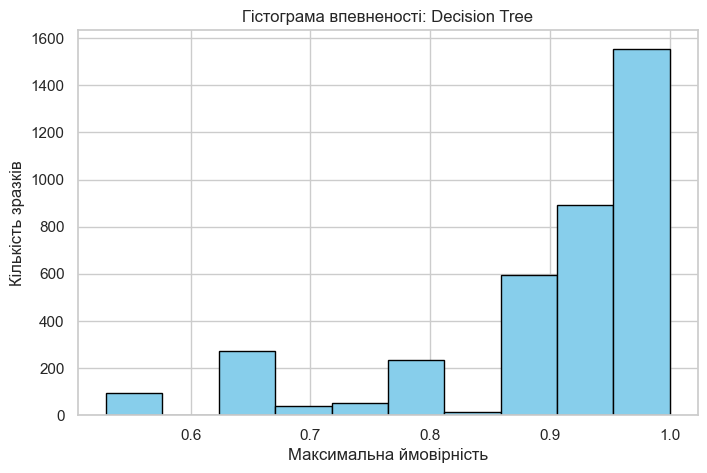

In [42]:
# Отримуємо максимальну ймовірність для кожного зразка
max_probs_tree = np.max(probs_tree, axis=1)

# Гістограма
plt.figure(figsize=(8, 5))
plt.hist(max_probs_tree, bins=10, color='skyblue', edgecolor='black')
plt.title("Гістограма впевненості: Decision Tree")
plt.xlabel("Максимальна ймовірність")
plt.ylabel("Кількість зразків")
plt.grid(True)
plt.show()

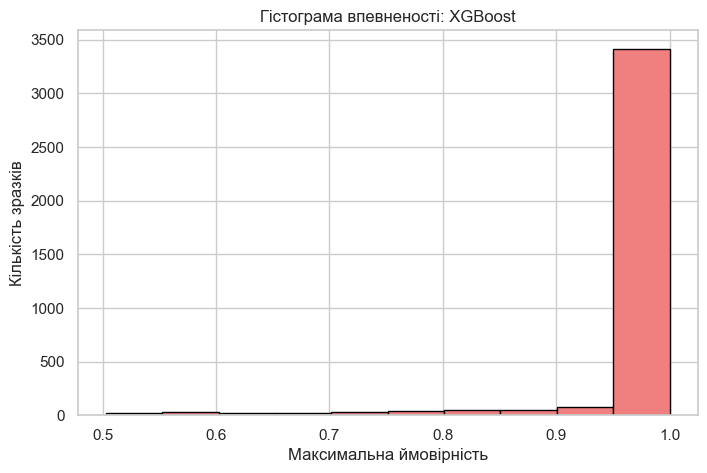

In [43]:
# Отримуємо максимальну ймовірність для кожного зразка
max_probs_xgb = np.max(logits_xgb, axis=1)

# Гістограма
plt.figure(figsize=(8, 5))
plt.hist(max_probs_xgb, bins=10, color='lightcoral', edgecolor='black')
plt.title("Гістограма впевненості: XGBoost")
plt.xlabel("Максимальна ймовірність")
plt.ylabel("Кількість зразків")
plt.grid(True)
plt.show()


<center><p><b>Як змінюється розподіл при overfitting та underfitting</p>

#### <center> <p style = 'background-color:darkblue'><b>Перенавчена модель</p> </center>

In [44]:
# Явно перенавчена модель
overfitted_tree = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Навчання
overfitted_tree.fit(X_train_resampled, y_train_resampled)

# Передбачення
y_pred_overfitted = overfitted_tree.predict(X_test_clasify_scaled_cut)

# Метрики
print("\n📋 Classification Report (Overfitted Decision Tree):")
print(classification_report(y_test_clasify_cut, y_pred_overfitted))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_clasify_cut, y_pred_overfitted))


📋 Classification Report (Overfitted Decision Tree):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1577
           1       0.93      0.95      0.94      1076
           2       0.94      0.90      0.92       805
           3       0.85      0.91      0.88       275
           4       0.68      0.76      0.72        17

    accuracy                           0.95      3750
   macro avg       0.88      0.90      0.89      3750
weighted avg       0.95      0.95      0.95      3750

📊 Confusion Matrix:
[[1543   34    0    0    0]
 [  29 1024   23    0    0]
 [   0   41  724   40    0]
 [   0    0   20  249    6]
 [   0    0    0    4   13]]


In [45]:
probs_tree_overfitted = overfitted_tree.predict_proba(X_test_clasify_scaled_cut)
# Обчислюємо максимум імовірності по класах
max_probs_tree_overfitted = np.max(probs_tree_overfitted, axis=1)

max_probs_tree_overfitted[:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [46]:
# Для Decision Tree overfitted
probs_tree_df_overfitted = pd.DataFrame(probs_tree_overfitted, columns=[f"Class {i}" for i in range(probs_tree_overfitted.shape[1])])
probs_tree_df_overfitted["Predicted Class"] = np.argmax(probs_tree_overfitted, axis=1)
print("Ймовірності для Decision Tree:")
display(probs_tree_df_overfitted.head())

Ймовірності для Decision Tree:


,Class 0,Class 1,Class 2,Class 3,Class 4,Predicted Class
0,1.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,1.0,0.0,0.0,2
2,0.0,1.0,0.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,2


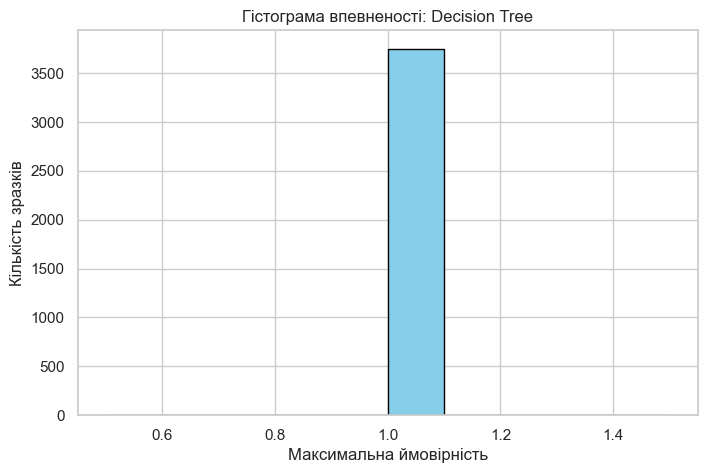

In [47]:
# Отримуємо максимальну ймовірність для кожного зразка overfitted
max_probs_tree = np.max(probs_tree_overfitted, axis=1)

# Гістограма
plt.figure(figsize=(8, 5))
plt.hist(max_probs_tree, bins=10, color='skyblue', edgecolor='black')
plt.title("Гістограма впевненості: Decision Tree")
plt.xlabel("Максимальна ймовірність")
plt.ylabel("Кількість зразків")
plt.grid(True)
plt.show()

#### <center> <p style = 'background-color:darkblue'><b>Недонавчена модель</p> </center>

In [48]:
# Недонавчена модель
underfitted_tree = DecisionTreeClassifier(
    max_depth=2,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

# Навчання
underfitted_tree.fit(X_train_clasify_scaled_qcut, y_train_clasify_qcut)

# Передбачення
y_pred_underfitted = underfitted_tree.predict(X_test_clasify_scaled_qcut)

# Метрики
print("\n📋 Decision Tree — Classification Report (Underfitted модель):")
print(classification_report(y_test_clasify_qcut, y_pred_underfitted))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_clasify_qcut, y_pred_underfitted))


📋 Decision Tree — Classification Report (Underfitted модель):
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       780
           1       0.74      0.81      0.77       734
           2       0.46      0.87      0.60       741
           3       0.00      0.00      0.00       756
           4       0.79      0.91      0.85       739

    accuracy                           0.69      3750
   macro avg       0.59      0.69      0.62      3750
weighted avg       0.59      0.69      0.62      3750

📊 Confusion Matrix:
[[663 117   0   0   0]
 [ 34 595 105   0   0]
 [  0  93 646   0   2]
 [  0   0 584   0 172]
 [  0   0  69   0 670]]


In [49]:
probs_tree_underfitted = underfitted_tree.predict_proba(X_test_clasify_scaled_cut)
# Обчислюємо максимум імовірності по класах
max_probs_underfitted = np.max(probs_tree_underfitted, axis=1)

max_probs_underfitted[:20] 

array([0.76101988, 0.80134281, 0.46237808, 0.95948522, 0.46237808,
       0.80134281, 0.95948522, 0.76101988, 0.76101988, 0.95948522,
       0.95948522, 0.95948522, 0.46237808, 0.46237808, 0.76101988,
       0.46237808, 0.46237808, 0.46237808, 0.46237808, 0.46237808])

In [50]:
# Для Decision Tree underfitted
probs_tree_df_underfitted = pd.DataFrame(probs_tree_underfitted, columns=[f"Class {i}" for i in range(probs_tree_underfitted.shape[1])])
probs_tree_df_underfitted["Predicted Class"] = np.argmax(probs_tree_underfitted, axis=1)
print("Ймовірності для Decision Tree:")
display(probs_tree_df_underfitted.head())

Ймовірності для Decision Tree:


,Class 0,Class 1,Class 2,Class 3,Class 4,Predicted Class
0,0.140882,0.761020,0.098099,0.000000,0.000000,1
1,0.000000,0.000000,0.001185,0.197472,0.801343,4
2,0.000232,0.082675,0.462378,0.411054,0.043660,2
3,0.959485,0.040515,0.000000,0.000000,0.000000,0
4,0.000232,0.082675,0.462378,0.411054,0.043660,2


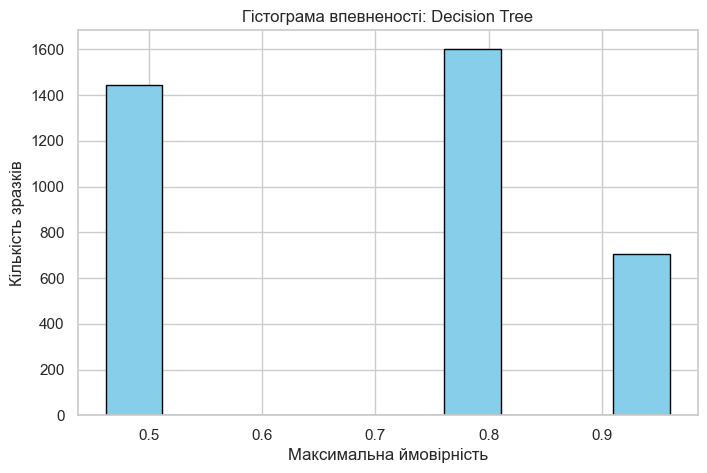

In [51]:
# Отримуємо максимальну ймовірність для кожного зразка underfitted
max_probs_tree = np.max(probs_tree_underfitted, axis=1)

# Гістограма
plt.figure(figsize=(8, 5))
plt.hist(max_probs_tree, bins=10, color='skyblue', edgecolor='black')
plt.title("Гістограма впевненості: Decision Tree")
plt.xlabel("Максимальна ймовірність")
plt.ylabel("Кількість зразків")
plt.grid(True)
plt.show()

## <Center> **Оптимізація класифікатора** </Center>

In [52]:
xgb_clf_cut = XGBClassifier(
    n_estimators=500,        # кількість дерев
    max_depth=5,             # глибина кожного дерева
    learning_rate=0.1,       # швидкість навчання
    subsample=0.8,           # частина даних для кожного дерева (допомагає уникнути overfitting)
    colsample_bytree=0.8,    # частка ознак для кожного дерева
    gamma=1,                 # мінімальна втрата для розгалуження
    reg_alpha=0.1,           # L1-регуляризація
    reg_lambda=1,            # L2-регуляризація
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Навчання
xgb_clf_cut.fit(X_train_clasify_scaled_cut, y_train_clasify_cut)

# Передбачення
y_pred_xgb_cut = xgb_clf_cut.predict(X_test_clasify_scaled_cut)

# Метрики
print("📋 XGBoost — Classification Report:")
print(classification_report(y_test_clasify_cut, y_pred_xgb_cut))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_clasify_cut, y_pred_xgb_cut))

📋 XGBoost — Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1577
           1       0.96      0.97      0.97      1076
           2       0.96      0.96      0.96       805
           3       0.93      0.95      0.94       275
           4       1.00      0.65      0.79        17

    accuracy                           0.97      3750
   macro avg       0.97      0.90      0.93      3750
weighted avg       0.97      0.97      0.97      3750

📊 Confusion Matrix:
[[1555   22    0    0    0]
 [  15 1042   19    0    0]
 [   0   16  776   13    0]
 [   0    0   15  260    0]
 [   0    0    0    6   11]]


## <Center> **Перетворення метрик між регресією та класифікацією** </Center>

<center><p><b>MAE - Accuracy</p></center>

In [ ]:
y_test = np.array(y_test).reshape(-1, 1)
y_pred = np.array(y_pred).reshape(-1, 1)
    
# Дискретизація
y_true_class = y_test_clasify_cut
y_pred_class = y_pred_xgb_cut

# Обчислимо MAE між класами
mae_class = np.mean(np.abs(y_true_class - y_pred_class))

# MAE між номерами класів
print(mae_class)
# Формула для приблизної accuracy
max_error = 5 - 1
approx_accuracy = 1 - (mae_class / max_error)
print(approx_accuracy)

0.028266666666666666
0.9929333333333333


<center><p><b>Accurancy - MAE</p></center>

In [82]:

accuracy = 0.97
n_classes = 5
# Обчислення максимальної можливої помилки при класифікації
max_possible_error = (n_classes - 1) / 2

# Перетворення Accuracy у MAE
approx_mae = (1 - accuracy) * max_possible_error

# Округлення для зручності
approx_mae = round(approx_mae, 3)

# Вивід результату
print(f"Accuracy: {accuracy}")
print(f"Оцінена MAE між класами: {approx_mae}")


Accuracy: 0.97
Оцінена MAE між класами: 0.06


In [79]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

# Кількість класів
n_bins = 4

# Навчання дискретизатора на y_test
kbin = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
kbin.fit(y_test.reshape(-1, 1))  # Без .values!

# Дискретизація передбачень
y_pred_binned = kbin.transform(y_pred.reshape(-1, 1)).astype(int).flatten()

# Дискретизація істинних значень
y_true_binned = kbin.transform(y_test.reshape(-1, 1)).astype(int).flatten()

# Accuracy між класами
accuracy = accuracy_score(y_true_binned, y_pred_binned)
print(f"Accuracy між істинними класами та передбаченими з регресії: {accuracy:.4f}")


Accuracy між істинними класами та передбаченими з регресії: 0.9797


In [80]:
bin_means = {}
for cls in np.unique(y_true_binned):
    bin_means[cls] = y_test[y_true_binned == cls].mean()

print("Середні значення цільової змінної для кожного класу:")
for k, v in bin_means.items():
    print(f"Клас {k}: {v:.2f}")

# Замінюємо передбачені класи на середнє значення відповідного класу
y_pred_avg = np.array([bin_means[cls] for cls in y_pred_binned])

# Обчислюємо MAE між цими "середніми" прогнозами і справжніми значеннями
mae_avg = mean_absolute_error(y_test, y_pred_avg)
print(f"\nMAE через середні значення класів: {mae_avg:.4f}")

Середні значення цільової змінної для кожного класу:
Клас 0: 17.69
Клас 1: 56.80
Клас 2: 108.84
Клас 3: 179.64

MAE через середні значення класів: 14.1808
